In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory



# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plot
from wordcloud import WordCloud
import string
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("/kaggle/input/movies-dataset-for-feature-extracion-prediction/movies.csv")
data.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MOVIES    9999 non-null   object 
 1   YEAR      9355 non-null   object 
 2   GENRE     9919 non-null   object 
 3   RATING    8179 non-null   float64
 4   ONE-LINE  9999 non-null   object 
 5   STARS     9999 non-null   object 
 6   VOTES     8179 non-null   object 
 7   RunTime   7041 non-null   float64
 8   Gross     460 non-null    object 
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [5]:
data.describe(include = 'all')

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
count,9999,9355,9919,8179.000000,9999,9999,8179,7041.000000,460
unique,6817,438,510,NaN,8688,7877,4129,NaN,332
top,Bleach: Burîchi,(2020– ),\nComedy,NaN,\nAdd a Plot\n,\n,7,NaN,$0.01M
freq,65,892,852,NaN,1265,456,35,NaN,22
mean,NaN,NaN,NaN,6.921176,NaN,NaN,NaN,68.688539,NaN
std,NaN,NaN,NaN,1.220232,NaN,NaN,NaN,47.258056,NaN
min,NaN,NaN,NaN,1.100000,NaN,NaN,NaN,1.000000,NaN
25%,NaN,NaN,NaN,6.200000,NaN,NaN,NaN,36.000000,NaN
50%,NaN,NaN,NaN,7.100000,NaN,NaN,NaN,60.000000,NaN
75%,NaN,NaN,NaN,7.800000,NaN,NaN,NaN,95.000000,NaN


MISSING VALUES

In [6]:
data.isnull().sum()

MOVIES         0
YEAR         644
GENRE         80
RATING      1820
ONE-LINE       0
STARS          0
VOTES       1820
RunTime     2958
Gross       9539
dtype: int64

Identifying Datatype

<Axes: >

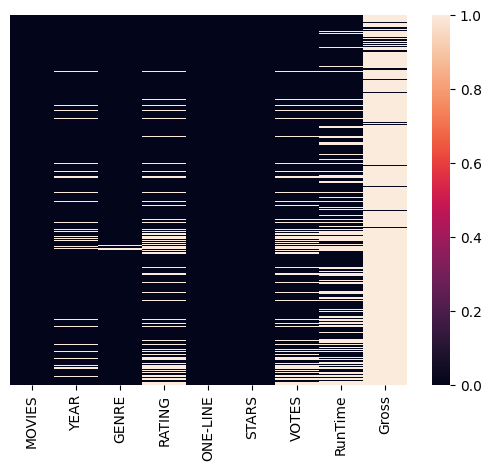

In [7]:
plot.figure()
sns.heatmap(data.isnull(), yticklabels=False, cbar=True)

In [8]:
numcolumn = data._get_numeric_data().columns.tolist()
print(numcolumn)

['RATING', 'RunTime']


In [9]:
catcolumn = set(data.columns) - set(numcolumn)
print(catcolumn)

{'VOTES', 'ONE-LINE', 'STARS', 'YEAR', 'MOVIES', 'GENRE', 'Gross'}


In [10]:
for i in catcolumn:
    data[i].fillna(data[i].mode()[0], inplace=True)
for i in numcolumn:
    data[i].fillna(data[i].mean(), inplace=True)

In [11]:
data.isnull().sum()

MOVIES      0
YEAR        0
GENRE       0
RATING      0
ONE-LINE    0
STARS       0
VOTES       0
RunTime     0
Gross       0
dtype: int64

In [12]:
new_df = data[['MOVIES',	'GENRE',	'ONE-LINE',	'STARS']]
new_df.set_index('MOVIES', inplace=True)
new_df.head()

,GENRE,ONE-LINE,STARS
MOVIES,,,
Blood Red Sky,"\nAction, Horror, Thriller",\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...
Masters of the Universe: Revelation,"\nAnimation, Action, Adventure",\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara..."
The Walking Dead,"\nDrama, Horror, Thriller",\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n..."
Rick and Morty,"\nAnimation, Adventure, Comedy",\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n..."
Army of Thieves,"\nAction, Crime, Horror","\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...


In [13]:
new_df.fillna('', inplace=True)

In [14]:
# For director, cast, and listed_in
# Because there is more than 1 people and categories
# We don't want if people share the same first or last name consider the same person
# or the word that appear in many categories (TV, etc) consider the same category
def separate(texts):
    t = []
    for text in texts.split(','):
        t.append(text.replace(' ', '').lower())
    return ' '.join(t)

def remove_space(texts):
    return texts.replace(' ', '').lower()

def remove_punc(texts):
    return texts.translate(str.maketrans('','',string.punctuation)).lower()

In [15]:
new_df['GENRE'] = new_df['GENRE'].apply(remove_space)
new_df['STARS'] = new_df['STARS'].apply(separate)
new_df['ONE-LINE'] = new_df['ONE-LINE'].apply(separate)

new_df.head()

,GENRE,ONE-LINE,STARS
MOVIES,,,
Blood Red Sky,"\naction,horror,thriller",\nawomanwithamysteriousillnessisforcedintoacti...,\ndirector:\npeterthorwarth\n|\nstars:\nperiba...
Masters of the Universe: Revelation,"\nanimation,action,adventure",\nthewarforeterniabeginsagaininwhatmaybethefin...,\n\nstars:\nchriswood \nsarahmichellegellar \n...
The Walking Dead,"\ndrama,horror,thriller",\nsheriffdeputyrickgrimeswakesupfromacomatolea...,\n\nstars:\nandrewlincoln \nnormanreedus \nmel...
Rick and Morty,"\nanimation,adventure,comedy",\nananimatedseriesthatfollowstheexploitsofasup...,\n\nstars:\njustinroiland \nchrisparnell \nspe...
Army of Thieves,"\naction,crime,horror",\naprequel setbeforetheeventsofarmyofthedead w...,\ndirector:\nmatthiasschweighöfer\n|\nstars:\n...


In [16]:
new_df['bag_of_words'] = ''

# Combine all the words into 1 column
for i, row in enumerate(new_df.iterrows()):
    string = ''
    for col in new_df.columns:
        if row[1][col] == '':
            continue
        else:
            string += row[1][col] + ' '
            new_df['bag_of_words'][i] = string.strip()

new_df.drop(new_df.columns[:-1], axis=1, inplace=True)

In [17]:
new_df.head()


,bag_of_words
MOVIES,
Blood Red Sky,"action,horror,thriller \nawomanwithamysterious..."
Masters of the Universe: Revelation,"animation,action,adventure \nthewarforeterniab..."
The Walking Dead,"drama,horror,thriller \nsheriffdeputyrickgrime..."
Rick and Morty,"animation,adventure,comedy \nananimatedseriest..."
Army of Thieves,"action,crime,horror \naprequel setbeforetheeve..."


In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [19]:
tfid = TfidfVectorizer()
tfid_matrix = tfid.fit_transform(new_df['bag_of_words'])

#tfid_matrix.vocabulary_

In [20]:
cosine_sim = cosine_similarity(tfid_matrix, tfid_matrix)
cosine_sim

array([[1.        , 0.01211169, 0.05403134, ..., 0.00746985, 0.00806944,
        0.00806944],
       [0.01211169, 1.        , 0.00235276, ..., 0.        , 0.01640794,
        0.01640794],
       [0.05403134, 0.00235276, 1.        , ..., 0.        , 0.01058094,
        0.01058094],
       ...,
       [0.00746985, 0.        , 0.        , ..., 1.        , 0.03981872,
        0.03981872],
       [0.00806944, 0.01640794, 0.01058094, ..., 0.03981872, 1.        ,
        0.78437729],
       [0.00806944, 0.01640794, 0.01058094, ..., 0.03981872, 0.78437729,
        1.        ]])

In [21]:
# Later on we will combine with similarity as a column
final_df = data[['MOVIES', 'GENRE']]

In [22]:
def recommendation(title, total_result=5, threshold=0.5):
    # Get the index
    idx = final_df[final_df['MOVIES'] == title].index[0]
    # Create a new column for similarity, the value is different for each title you input
    final_df['similarity'] = cosine_sim[idx]
    sort_final_df = final_df.sort_values(by='similarity', ascending=False)[1:total_result+1]
    
    # You can set a threshold if you want to norrow the result down 
    #sort_final_df = sort_final_df[sort_final_df['similarity'] > threshold]
    
    # Is the title a movie or tv show?
    movies = sort_final_df['MOVIES'][sort_final_df['GENRE'] == 'Movie']
    tv_shows = sort_final_df['MOVIES'][sort_final_df['GENRE'] == 'TV Show']
    
    if len(movies) != 0:
        print('Similar Movie(s) list:')
        for i, movie in enumerate(movies):
            print('{}. {}'.format(i+1, movie))
        print()
    else:
        print('Similar Movie(s) list:')
        print('-\n')
        
    if len(tv_shows) != 0:
        print('Similar TV_show(s) list:')
        for i, tv_show in enumerate(tv_shows):
            print('{}. {}'.format(i+1, tv_show))
    else:
        print('Similar TV_show(s) list:')
        print('-')

